In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [59]:
df = pd.read_csv("D:/offical/Kartik/VESIM Docs/Internship/In-house Internship/project-3/Placement_Data.csv")

In [60]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed,425000.0


### Using pandas_profiling to make EDA report

In [61]:
report = pp.ProfileReport(df)

In [62]:
report.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\visualisation\utils.py:66: MatplotlibDeprecationWarning: 
The tostring_rgba_minimized function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  plt.savefig(image_str, format=image_format)
C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\visualisation\utils.py:66: MatplotlibDeprecationWarning: 
The get_content_extents function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  plt.savefig(image_str, format=image_format)
C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\visualisation\utils.py:66: MatplotlibDeprecationWarning: 
The tostring_rgba_minimized function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  plt.savefig(image_str, format=image_format)
C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\visualisation\utils.py:66: M

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from the report

67 Missing values in Salary. Assuming these missing values are of the students who didn't get placed. (Status = Not placed = 67)

Salary data is right skewed. Very few people have salary greater than 40,000.

### Unique values of Categorical features

In [63]:
df["gender"].unique()
df["hsc_b"].unique()
df["hsc_s"].unique()
df["degree_t"].unique()
df["workex"].unique()
df["specialisation"].unique()

array(['Mkt_HR', 'Mkt_Fin'], dtype=object)

### Checking for null values

In [64]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [65]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [66]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

## Let us check placement status with respect to different features and see which are the significant features.

In [67]:
df = df.drop(["sl_no"],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed,425000.0


### 1) If gender affect placements.

<AxesSubplot:xlabel='gender', ylabel='count'>

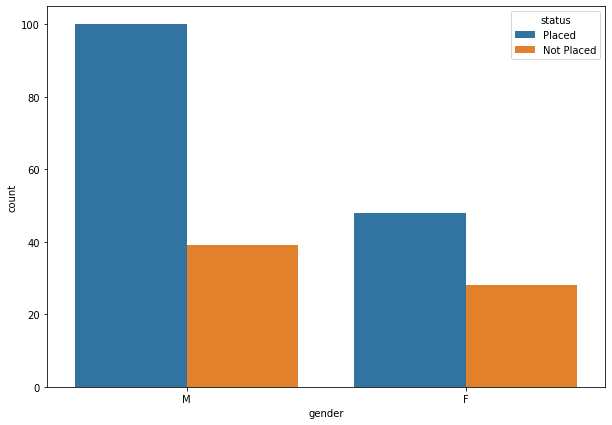

In [68]:
plt.figure(figsize = (10,7))
sns.countplot(x = "gender", hue = "status", data = df)

There are 139 Male studets and 76 Female students.

Male students have comparatively higher placemets. Yes. GENDER AFFECTS PLACEMENTS.

### 2) Whether Secondary Education affect placements

Text(0.5, 0, 'SSC Percentage')

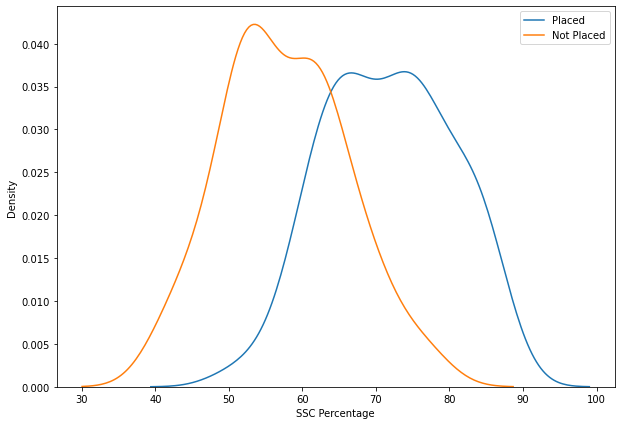

In [69]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["ssc_p"][df["status"]=="Placed"])
sns.kdeplot(df["ssc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("SSC Percentage")

C:\Users\kartik\anaconda3\envs\PlacementPrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ssc_b', ylabel='count'>

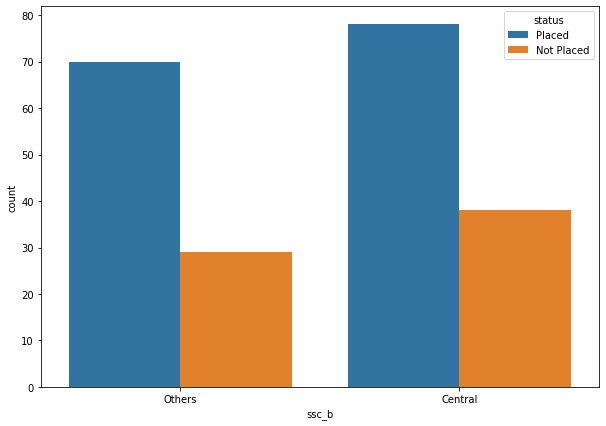

In [70]:
plt.figure(figsize = (10,7))
sns.countplot("ssc_b", hue="status", data=df)

Students with SSC Percentage above 90% are placed

Students with SSC Percentage below 40% are not-placed

Students with good SSC Percentage are placed on average.

SSC Percentage DOES affect the placement status.
Board Of Secondary Education DOES NOT affect much to Placement Status.

### 3) If Higher Secondary School affect Placements

Text(0.5, 0, 'HSC Percentage')

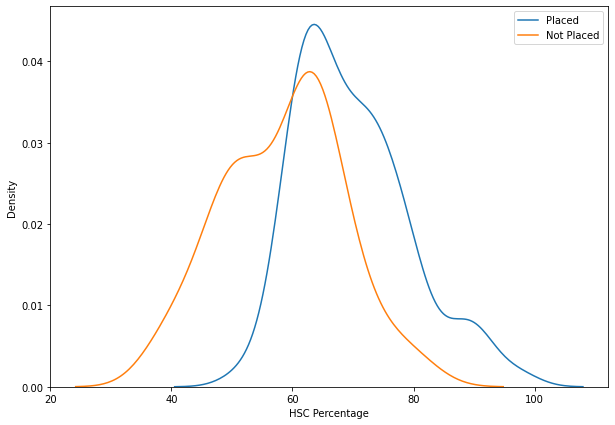

In [71]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["hsc_p"][df["status"]=="Placed"])
sns.kdeplot(df["hsc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("HSC Percentage")

C:\Users\kartik\anaconda3\envs\PlacementPrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hsc_b', ylabel='count'>

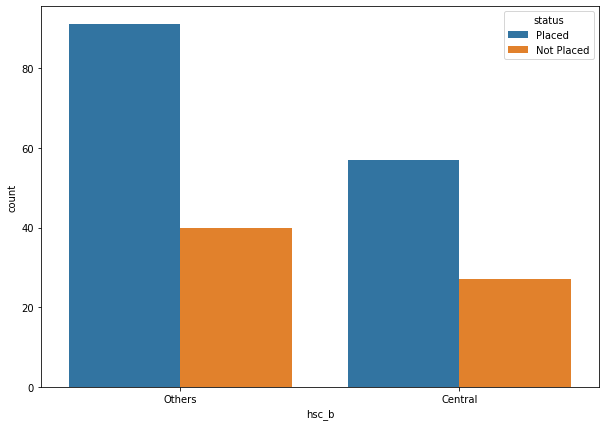

In [72]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_b", hue="status", data=df)

C:\Users\kartik\anaconda3\envs\PlacementPrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hsc_s', ylabel='count'>

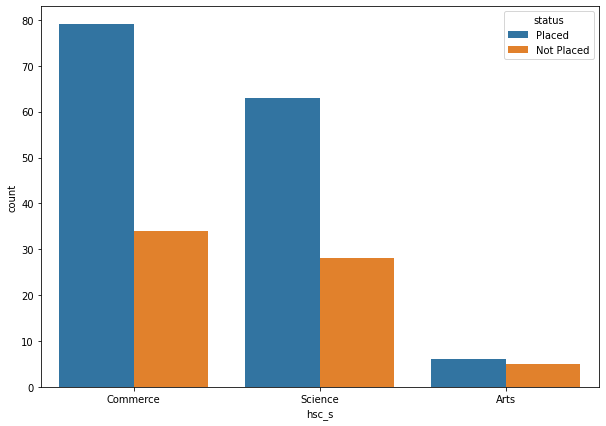

In [73]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_s", hue="status", data=df)

More placements for percentage above 65%.

Drop in placements below 60%. Therefore, there might be a criteria that "Percentage must be atleast 60 for chance of being placed".

We have very less students with Arts specialization. Students from Science and Commerse field have good chance of placement.

HSC percentage and HSC Specialization DOES affect Placement Status. Board Of Higher Secondary Education DOES affect much to Placement Status.

### 4) Does Under Graduate affect placements?

Text(0.5, 0, 'UG Percentage')

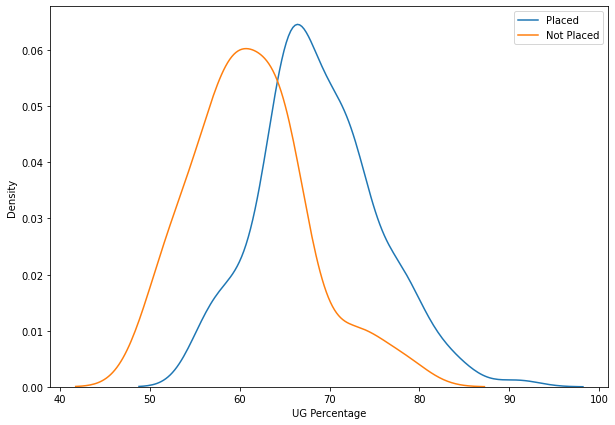

In [74]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["degree_p"][df["status"]=="Placed"])
sns.kdeplot(df["degree_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("UG Percentage")

<AxesSubplot:xlabel='degree_t', ylabel='count'>

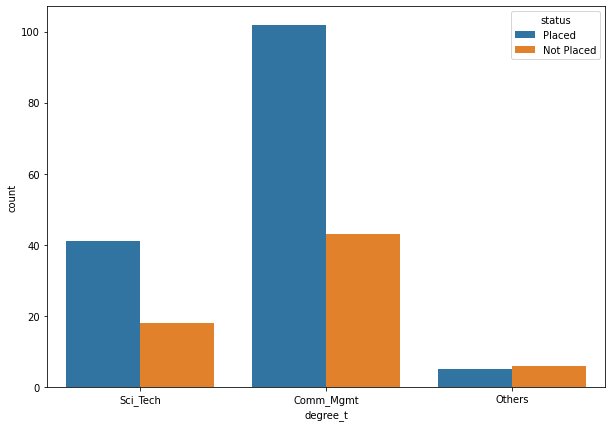

In [75]:
plt.figure(figsize = (10,7))
sns.countplot(x = "degree_t", hue = "status", data = df)

More placements for percentage above 65.

There are very less students with "Other". We cant make decision from few cases.

Around 2:1 placed:unplaced ratio for both Science and Commerse students.

UG percentage and UG Specialization DOES affect Placement Status.

### 5) Does Work Experience affect placements?

C:\Users\kartik\anaconda3\envs\PlacementPrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workex', ylabel='count'>

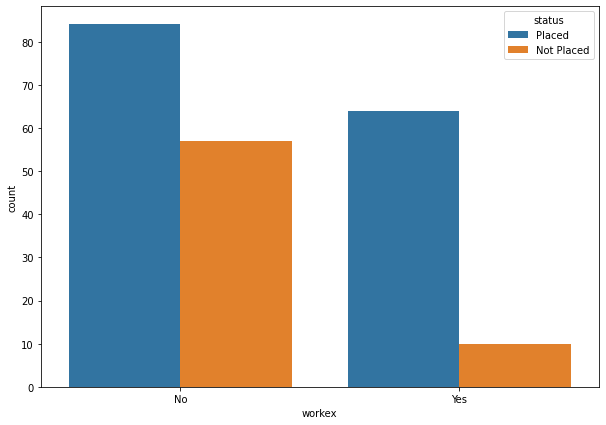

In [76]:
plt.figure(figsize = (10,7))
sns.countplot("workex", hue="status", data = df)

Work Exp DOES affect Placement. Very few students with work experience not getting placed.

### 6) Employability test percentage?

Text(0.5, 0, 'Employability test percentage')

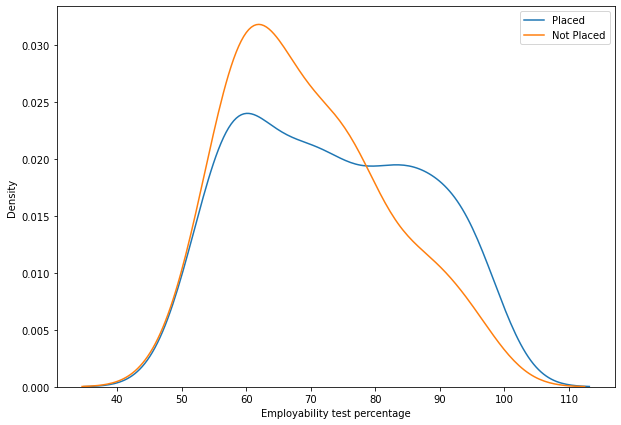

In [77]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["etest_p"][df["status"]=="Placed"])
sns.kdeplot(df["etest_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")

More "Not Placed" are of 50%-70% range and more placed are of > 80% percentage range. Employability test percentage DOES affect Placement Status.

### 7) What about Post Graduate Specialization

C:\Users\kartik\anaconda3\envs\PlacementPrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='specialisation', ylabel='count'>

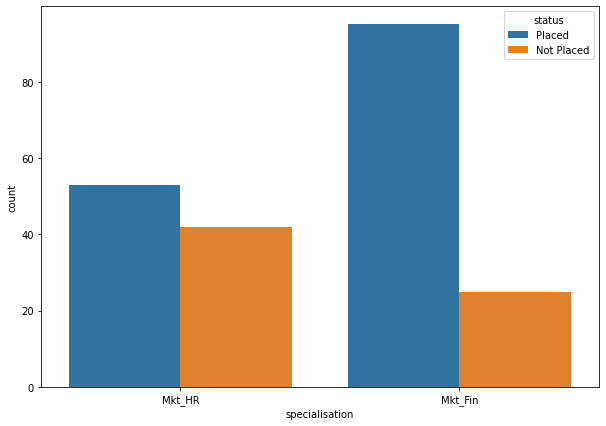

In [78]:
plt.figure(figsize = (10,7))
sns.countplot("specialisation", hue="status", data = df)

Text(0.5, 0, 'PG Percentage')

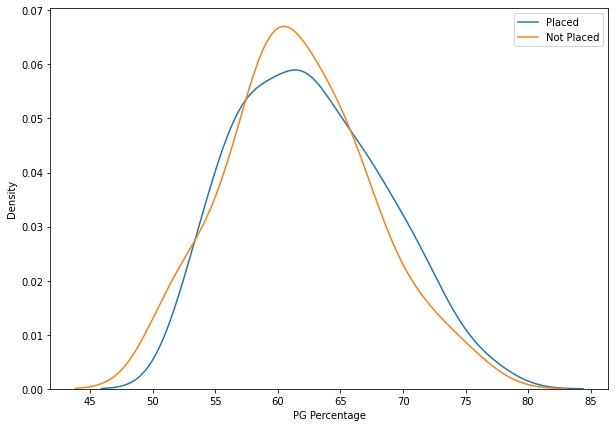

In [79]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["mba_p"][df["status"]=="Placed"])
sns.kdeplot(df["mba_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("PG Percentage")

MBA Specialization feature DOES affect Placement status.

Comparitively very low not-placed students in Mkt&Fin Section.

MBA Percentage DOES affect placement status. From 65% to 80% there are students placed.

## List of features which are important for placement status

Gender

SSC Percentage

HSC Percentage

HSC Board of Education

HSC Specialization

UG Percentage

UG Specialization

Work Experience

Employability test percentage

MBA Specialization

MBA Percentage

### Dropping SSC board of education and salary because they do not have much affect on Placement Status. Salary because, the discussion of salary is done after the student is placed. So, for predicting placement status we don't need salary

In [81]:
data = df.drop(["ssc_b","salary"], axis = 1)
data.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed
1,M,79.33,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed
2,M,65.00,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed
3,M,56.00,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed
4,M,85.80,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed


## Feature Encoding

In [82]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci_Tech,workex_Yes,specialisation_Mkt_HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,0,0,1


# Model Creation

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [84]:
X = data.drop(["status_Placed"],axis = 1)
y = data["status_Placed"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 71)

In [86]:
print("X_train shape is {}".format(X_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

X_train shape is (150, 13)
X_test shape is (65, 13)
y_train shape is (150,)
y_test shape is (65,)


In [87]:
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci_Tech,workex_Yes,specialisation_Mkt_HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,0,0


## Decision Tree Classifier

In [88]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 71, class_weight = "balanced")
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_dt))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))


print('\nclassification report')
print(classification_report(y_test, y_pred_dt))


confustion matrix
[[12  8]
 [ 3 42]]


Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333

classification report
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65



In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",dt.score(X_train,y_train))
print("test Accuracy : ",dt.score(X_test,y_test))

Area Under ROC Curve: 0.7666666666666666
train Accuracy :  1.0
test Accuracy :  0.8307692307692308


## Random Forest Classifier

In [90]:
rf = RandomForestClassifier(criterion='gini',n_estimators = 20, random_state = 71)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))


print('\nclassification report')
print(classification_report(y_test, y_pred_rf))


confustion matrix
[[13  7]
 [ 4 41]]


Accuracy: 0.8307692307692308
Precision: 0.8541666666666666
Recall: 0.9111111111111111

classification report
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

Area Under ROC Curve: 0.7805555555555554
train Accuracy :  1.0
test Accuracy :  0.8307692307692308


## K Nearest Neighbour Classification

In [92]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train,y_train)


y_pred_knn = knn.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))


print('\nclassification report')
print(classification_report(y_test, y_pred_knn))


confustion matrix
[[13  7]
 [ 4 41]]


Accuracy: 0.8769230769230769
Precision: 0.8627450980392157
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.86      0.98      0.92        45

    accuracy                           0.88        65
   macro avg       0.90      0.81      0.84        65
weighted avg       0.88      0.88      0.87        65



In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",knn.score(X_train,y_train))
print("test Accuracy : ",knn.score(X_test,y_test))

Area Under ROC Curve: 0.8138888888888889
train Accuracy :  0.8866666666666667
test Accuracy :  0.8769230769230769


### Calculating optimum number of neighbours

In [94]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

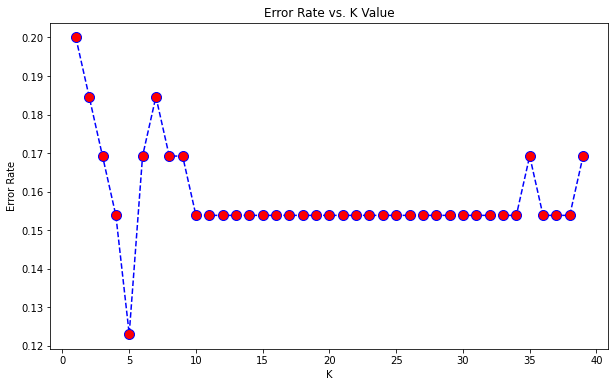

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Since Neighbours = 5 gives us least error, we use K = 5

## Logistic Regression

In [96]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_lr))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))


print('\nclassification report')
print(classification_report(y_test, y_pred_lr))


confustion matrix
[[12  8]
 [ 2 43]]


Accuracy: 0.8461538461538461
Precision: 0.8431372549019608
Recall: 0.9555555555555556

classification report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",lr.score(X_train,y_train))
print("test Accuracy : ",lr.score(X_test,y_test))

Area Under ROC Curve: 0.7777777777777778
train Accuracy :  0.9066666666666666
test Accuracy :  0.8461538461538461


## Model Accuracy

### We have applied 4 classification models without applying feature scaling. The accuracy is as follows:

Decision Tree Classifier -> 83.07%

Random Forest Classifier -> 83.07%

K Nearest Neighbour -> 87.6%

Logistic Regression -> 84.6%

### So we will use KNN Model for our deployment

# Model Deployment

In [47]:
import pickle

In [48]:
file = open('knn_model.pkl', 'wb')

In [49]:
pickle.dump(knn, open("knn_model.pkl", "wb"))